# Итоговая работа

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

import math
%matplotlib inline

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [3]:
ratings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого пользователя (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [4]:
def cosine( a, b ):
    """
    Подсчет косинуса угла между векторами a, b по их координатам
    """
    
    # длины векторов
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )
    
    return np.dot( a, b ) / ( aLength * bLength )

In [5]:
for user in ratings:
    print(f'User {user} is most similar to')
    max_so_far = 0
    for similar_user in ratings:
        similarity = round(cosine( user, similar_user ), 3)
        if similarity == 1.0:
            continue
        elif max_so_far < similarity:
            max_so_far = similarity
    for similar_user in ratings:
        similarity = round(cosine( user, similar_user ), 3)
        if max_so_far == similarity:
            print(f'user {similar_user} with cosine similarity of {similarity}')
    print('\n')

User [ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6] is most similar to
user [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4] with cosine similarity of 0.911


User [ 9  2  5 10  7  8 10  5  6  2  1  6  8  9  7] is most similar to
user [ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6] with cosine similarity of 0.871


User [ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6] is most similar to
user [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10] with cosine similarity of 0.919


User [6 1 9 7 7 9 2 3 5 1 6 6 3 2 7] is most similar to
user [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10] with cosine similarity of 0.859


User [ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6] is most similar to
user [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4] with cosine similarity of 0.879


User [ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1] is most similar to
user [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10] with cosine similarity of 0.855


User [ 9  8  4  8  8 10  6  1  1  2  9  5  2  7  2] is most similar to
us

b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [6]:
from sklearn.decomposition import TruncatedSVD

In [7]:
svd = TruncatedSVD(5)
ratings_transformed = svd.fit_transform(ratings)

In [8]:
ratings_transformed

array([[23.41982063, -5.36092136,  3.83196779, -4.06950174,  1.10267269],
       [24.76774917,  4.52188701,  1.35815965,  1.58128545,  8.59912002],
       [22.27728589, -6.96492049, -4.84461485, -0.47661647,  3.37152266],
       [19.4257757 ,  2.64575227, -6.86014009, -4.76604765,  1.96075707],
       [22.8146354 ,  0.51464093,  7.70180188,  4.42379773,  1.29124163],
       [21.76961656,  1.94294987, -4.56934779,  8.32306487, -2.21887359],
       [21.23427453,  9.78047778,  1.16340271, -4.86074521, -2.60815471],
       [19.97476815,  4.00048677, -1.67456316,  1.1512346 , -3.5637169 ],
       [26.39306998, -3.03090482,  5.86422753, -1.67503491, -3.71500141],
       [29.94016844, -4.82012297, -3.48912415,  0.05527083, -3.62526487]])

In [9]:
svd.explained_variance_ratio_

array([0.07951819, 0.22322522, 0.19305559, 0.14061375, 0.12711606])

In [10]:
from sklearn.decomposition import PCA
import pandas as pd

In [11]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(ratings)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5'])

In [12]:
principalDf

,PC 1,PC 2,PC 3,PC 4,PC 5
0,-5.309861,1.929198,-4.933000,2.701880,5.504979
1,2.877634,2.716596,1.405928,7.263258,-4.503223
2,-4.940104,-6.688612,-0.945502,3.615567,-0.689693
3,5.149399,-6.280273,-4.659786,1.090240,-1.014711
4,-1.374887,7.543580,4.008344,2.128400,-0.163249
5,2.653420,-3.770756,8.584307,-1.466283,1.674018
6,8.615739,3.786033,-4.027210,-4.375826,-3.138803
7,5.396583,-1.017047,1.014567,-1.895128,6.548835
8,-5.784349,5.298571,-1.480836,-3.712955,0.213127
9,-7.283574,-3.517291,1.033188,-5.349152,-4.431280


In [13]:
pca.explained_variance_ratio_

array([0.25373748, 0.1970209 , 0.14113306, 0.12956371, 0.11289928])

## Задание 2

$f(x) = tg^2(sin(x) + cos (2x + 3))$  в точке $x_0 = 1$. Найти производную в python и на бумаге.

In [14]:
x = Symbol('x')
f = tan(sin(x)+cos(2*x+3))**2
f_prime = f.diff(x)

In [15]:
f

tan(sin(x) + cos(2*x + 3))**2

In [16]:
f_prime

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [17]:
f = lambdify(x, f)
f_prime = lambdify(x, f_prime)
f_prime(1)

55.385917635337854

$f(x) = tan^2 (sin(x) + cos(2x+3))$

$f'(x) = 2(cos(x) − 2sin(2x+3)) sec^2(cos(2x+3)+sin(x))tan(cos(2x+3)+sin(x))$

$f'(1) = 2\times((cos(1) - 2sin(2\times1 +3)) \times sec^2(cos(2\times1 + 3)+sin(1)) \times tan(cos(2\times1+3)+sin(1)) = 55.386$

## Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [18]:
from scipy.optimize import minimize

In [19]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [20]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [21]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

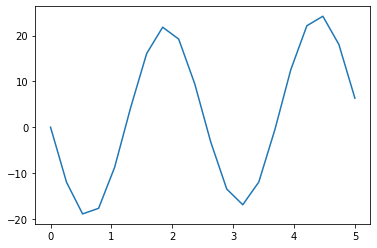

In [22]:
plt.plot(x, fx)
plt.show()

In [23]:
a = []
b = []

for i in range(20):
    def error(params):
        return np.sum(np.abs(fx[i] - f(x[i], params[0], params[1])))
    
    x_initial = np.array([2, 5])
    
    res = minimize(error, x_initial, method = 'COBYLA')
    a.append(res.x[0])
    b.append(res.x[1])

In [24]:
print(np.mean(a))

2.5831977084959368


In [25]:
print(np.mean(b))

5.019734701106126


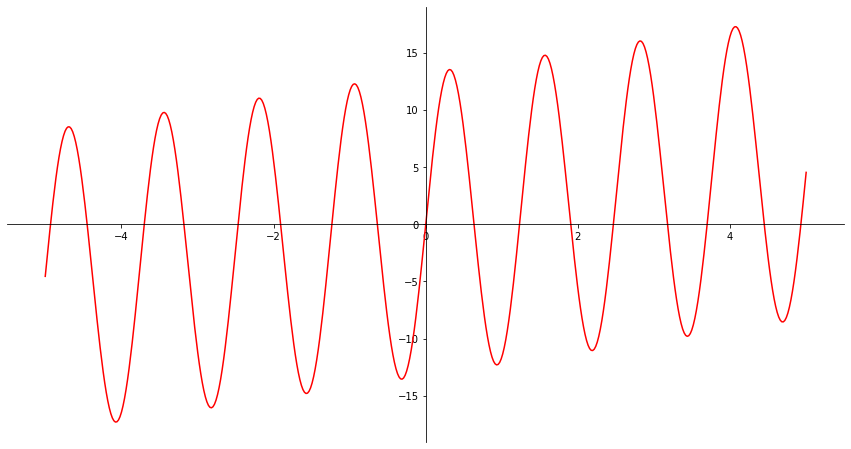

In [26]:
# 100 linearly spaced numbers
x = np.linspace(-5,5,500)

# the functions
res = np.e**np.mean(a) * np.sin(np.mean(b)*x) + x

# setting the axes at the centre
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the functions
plt.plot(x,res, color="red")

# show the plot
plt.show()

In [27]:
from scipy.optimize import differential_evolution

In [28]:
bounds = [(-10, 10), (-10, 10)]

In [29]:
a = []
b = []

for i in range(20):
    def error(params):
        return np.sum(np.abs(fx[i] - f(x[i], params[0], params[1])))
    
    x_initial = np.array([2, 5])
    
    res = differential_evolution(error, 
                                bounds,
                                popsize = 15, 
                                tol=0.09, 
                                mutation=0.1, 
                                recombination=0.7, 
                                seed=42, 
                                updating='immediate')
    a.append(res.x[0])
    b.append(res.x[1])

In [30]:
print(np.mean(a))

2.8836973937738906


In [31]:
print(np.mean(b))

-2.039524378575345


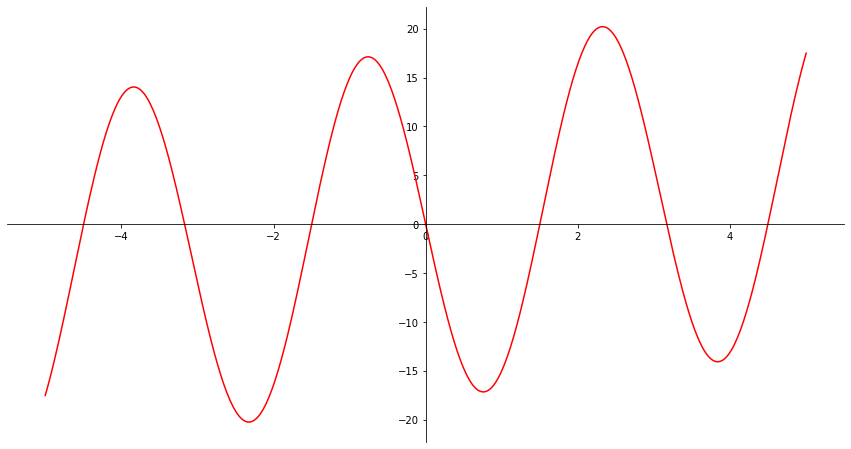

In [32]:
# 100 linearly spaced numbers
x = np.linspace(-5,5,500)

# the functions
res = np.e**np.mean(a) * np.sin(np.mean(b)*x) + x

# setting the axes at the centre
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the functions
plt.plot(x,res, color="red")

# show the plot
plt.show()

## Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [33]:
means = np.array([])

for i in range(1000):
    sample = np.random.randint(20, size=50)
    means = np.append(means, sample.mean())

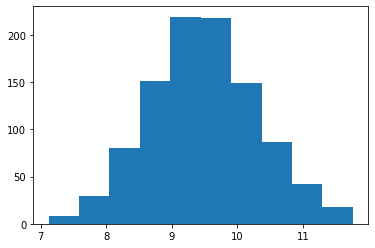

In [34]:
plt.hist(means, bins=10)
plt.show()

## Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

In [42]:
from scipy import linalg

In [43]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [44]:
a, U = linalg.eig(m)

for i in range(len(a)):
    print("Собственное значение " + str(np.round(a[i])), 0)
    print("соответствующий ему собственный вектор " + str(U[:,i]))

Собственное значение (3+0j) 0
соответствующий ему собственный вектор [0.89442719 0.4472136 ]
Собственное значение (-1+0j) 0
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]


$det(A-\lambda I) = 0$


$\begin{bmatrix} 
1-\lambda & 4 \\
1 & 1-\lambda \\
\end{bmatrix}$

$(1-\lambda)^2 - 4 = 0$

$\lambda_1 = -1$

$\begin{bmatrix} 
2 & 4 \\
1 & 2 \\
\end{bmatrix}
\times
\begin{bmatrix} 
x_1 \\
x_2 \\
\end{bmatrix}
= 0 $

$\begin{equation}
\begin{cases}
2x_1 + 4x_2 = 0 \\
x_1 + 2x_2 = 0
\end{cases}
\end{equation}
$

$x_1 = -2, x_2 = 1$

$\begin{bmatrix} 
1\\
-2\\
\end{bmatrix}$

$\lambda_2 = 3$

$\begin{bmatrix} 
-2 & 4 \\
1 & -2 \\
\end{bmatrix}
\times
\begin{bmatrix} 
x_1 \\
x_2 \\
\end{bmatrix}
= 0 $

$\begin{equation}
\begin{cases}
-2x_1 + 4x_2 = 0 \\
x_1 - 2x_2 = 0
\end{cases}
\end{equation}
$

$x_1 = 2, x_2 = 1$

$\begin{bmatrix} 
1\\
2\\
\end{bmatrix}$